In [62]:
import datajoint as dj
import requests
import numpy as np
from astropy.stats import circmean
import cv2

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import Image

In [3]:
dj.conn()

Please enter DataJoint username: root
Please enter DataJoint password: ········
Connecting root@localhost:3306


DataJoint connection (connected) root@localhost:3306

In [4]:
schema = dj.schema('states')

In [5]:
states = dict(
    AL='Alabama',        AK='Alaska',       AZ='Arizona',      AR='Arkansas',
    CA='California',     CO='Colorado',     CT='Connecticut',  DE='Delaware',
    FL='Florida',        GA='Georgia',      HI='Hawaii',       ID='Idaho', 
    IL='Illinois',       IN='Indiana',      IA='Iowa',         KS='Kansas',
    KY='Kentucky',       LA='Louisiana',    ME='Maine',        MD='Maryland',
    MA='Massachusetts',  MI='Michigan',     MN='Minnesota',    MS='Mississippi',
    MO='Missouri',       MT='Montana',      NE='Nebraska',     NV='Nevada',
    NH='New Hampshire',  NJ='New Jersey',   NM='New Mexico',   NY='New York',
    NC='North Carolina', ND='North Dakota', OH='Ohio',         OK='Oklahoma',
    OR='Oregon',         PA='Pennsylvania', RI='Rhode Island', SC='South Carolina',
    SD='South Dakota',   TN='Tennessee',    TX='Texas',        UT='Utah',
    VT='Vermont',        VA='Virginia',     WA='Washington',   WV='West Virginia', 
    WI='Wisconsin',      WY='Wyoming')

In [6]:
@schema
class State(dj.Lookup):
    definition = """
    # United States
    state_code : char(2)
    ---
    state : varchar(20)
    """
    contents = states.items()

In [7]:
State()

*state_code    state         
+------------+ +------------+
AK             Alaska        
AL             Alabama       
AR             Arkansas      
AZ             Arizona       
CA             California    
CO             Colorado      
CT             Connecticut   
DE             Delaware      
FL             Florida       
GA             Georgia       
HI             Hawaii        
IA             Iowa          
   ...
 (Total: 50)

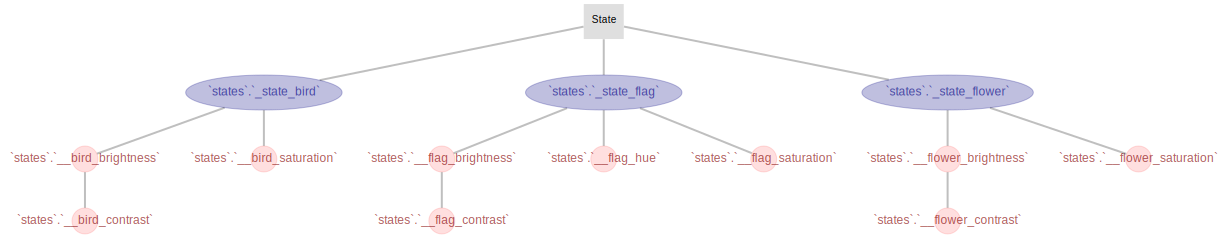

In [8]:
dj.Diagram(schema)

In [9]:
@schema
class StateBird(dj.Imported):
    definition = """
    -> State
    ---
    bird_image : longblob    
    """
    
    url_template = "http://www.theus50.com/images/state-birds/{state}-bird.jpg"
    
    def make(self, key):
        # fetch data upstream
        state = (State & key).fetch1('state')
        
        # compute
        url = self.url_template.format(state=state.lower().replace(' ', ''))
        temp_file = 'tmp.jpg'
        with open(temp_file, 'wb') as f:
            f.write(requests.get(url).content)
        
        # insert into self
        self.insert1(dict(key, bird_image=plt.imread(temp_file)))

In [10]:
StateBird().populate(display_progress=True, suppress_errors=True)

StateBird: 0it [00:00, ?it/s]


[]

In [11]:
StateBird()

*state_code    bird_image
+------------+ +--------+
AK             =BLOB=    
AL             =BLOB=    
AR             =BLOB=    
AZ             =BLOB=    
CA             =BLOB=    
CO             =BLOB=    
CT             =BLOB=    
DE             =BLOB=    
FL             =BLOB=    
GA             =BLOB=    
HI             =BLOB=    
IA             =BLOB=    
   ...
 (Total: 50)

In [12]:
img = (StateBird & {'state_code': "TX"}).fetch1('bird_image')

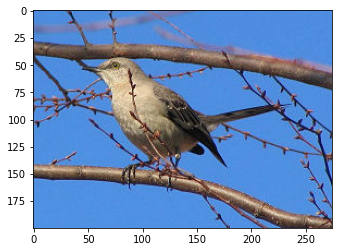

In [13]:
plt.imshow(img)
plt.show()

In [14]:
(StateBird & {'state_code': "TX"}).fetch1('bird_image')

array([[[ 81, 143, 226],
        [ 79, 141, 224],
        [ 78, 140, 223],
        ...,
        [ 78, 140, 223],
        [ 77, 139, 222],
        [ 77, 139, 222]],

       [[ 80, 142, 225],
        [ 79, 141, 224],
        [ 78, 140, 223],
        ...,
        [ 79, 141, 224],
        [ 79, 141, 224],
        [ 79, 141, 224]],

       [[ 79, 141, 224],
        [ 79, 141, 224],
        [ 78, 140, 223],
        ...,
        [ 81, 143, 226],
        [ 81, 143, 226],
        [ 81, 143, 226]],

       ...,

       [[ 79, 146, 227],
        [ 79, 146, 227],
        [ 79, 146, 227],
        ...,
        [137, 121,  95],
        [110,  94,  68],
        [116,  99,  73]],

       [[ 79, 146, 227],
        [ 79, 146, 227],
        [ 79, 146, 227],
        ...,
        [129, 110,  93],
        [ 66,  47,  30],
        [ 76,  57,  40]],

       [[ 79, 146, 227],
        [ 79, 146, 227],
        [ 79, 146, 227],
        ...,
        [ 86,  62,  52],
        [ 80,  56,  46],
        [ 78,  51,  42]]

In [15]:
@schema
class StateFlag(dj.Imported):
    definition = """
    -> State
    ---
    flag_image : longblob    
    """
    
    url_template = "http://www.theus50.com/images/state-flags/{state}-flag.jpg"
    
    def make(self, key):
        state = (State & key).fetch1('state')
        url = self.url_template.format(state=state.lower().replace(' ', ''))
        temp_file = 'tmp.jpg'
        with open(temp_file, 'wb') as f:
            f.write(requests.get(url).content)
        self.insert1(dict(key, flag_image=plt.imread(temp_file)))

In [16]:
StateFlag.populate(display_progress=True, suppress_errors=True)

StateFlag: 0it [00:00, ?it/s]


[]

In [17]:
@schema
class StateFlower(dj.Imported):
    definition = """
    -> State
    ---
    flower_image : longblob    
    """
    
    url_template = "http://www.theus50.com/images/state-flowers/{state}-flower.jpg"
    
    def make(self, key):
        state = (State & key).fetch1('state')
        url = self.url_template.format(state=state.lower().replace(' ', ''))
        temp_file = 'tmp.jpg'
        with open(temp_file, 'wb') as f:
            f.write(requests.get(url).content)
        self.insert1(dict(key, flower_image=plt.imread(temp_file)))

In [18]:
StateFlower.populate(display_progress=True)

StateFlower: 0it [00:00, ?it/s]


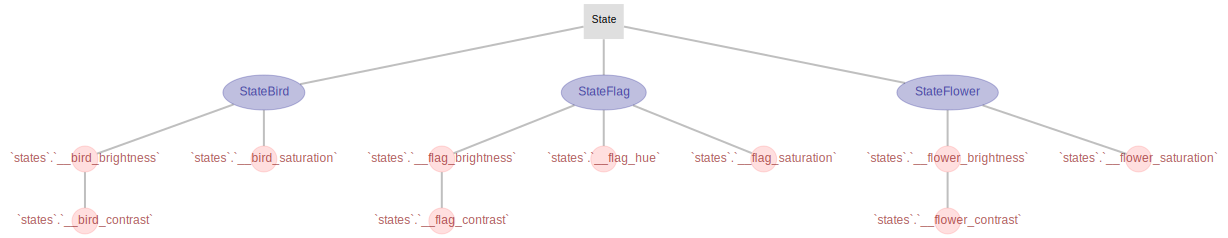

In [19]:
dj.Diagram(schema)

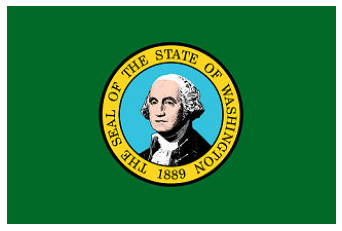

In [20]:
plt.imshow((StateFlag & {'state_code': 'WA'}).fetch1('flag_image'))
plt.axis(False);

In [21]:
StateFlag * State

*state_code    flag_image state         
+------------+ +--------+ +------------+
AK             =BLOB=     Alaska        
AL             =BLOB=     Alabama       
AR             =BLOB=     Arkansas      
AZ             =BLOB=     Arizona       
CA             =BLOB=     California    
CO             =BLOB=     Colorado      
CT             =BLOB=     Connecticut   
DE             =BLOB=     Delaware      
FL             =BLOB=     Florida       
GA             =BLOB=     Georgia       
HI             =BLOB=     Hawaii        
IA             =BLOB=     Iowa          
   ...
 (Total: 50)

In [22]:
(StateFlag & {'state_code': 'TX'}).fetch1('flag_image')

array([[[  0,  39, 104],
        [  0,  39, 104],
        [  0,  39, 104],
        ...,
        [191, 191, 191],
        [211, 211, 211],
        [179, 179, 179]],

       [[  0,  39, 104],
        [  0,  39, 104],
        [  0,  39, 104],
        ...,
        [244, 244, 244],
        [248, 248, 248],
        [200, 200, 200]],

       [[  0,  39, 104],
        [  0,  39, 104],
        [  0,  39, 104],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [193, 193, 193]],

       ...,

       [[  0,  39, 104],
        [  0,  39, 104],
        [  0,  39, 104],
        ...,
        [190,  10,  47],
        [190,  10,  47],
        [190,  10,  47]],

       [[  0,  39, 104],
        [  0,  39, 104],
        [  0,  39, 104],
        ...,
        [190,  10,  47],
        [190,  10,  47],
        [190,  10,  47]],

       [[  0,  39, 104],
        [  0,  39, 104],
        [  0,  39, 104],
        ...,
        [190,  10,  47],
        [190,  10,  47],
        [190,  10,  47]]

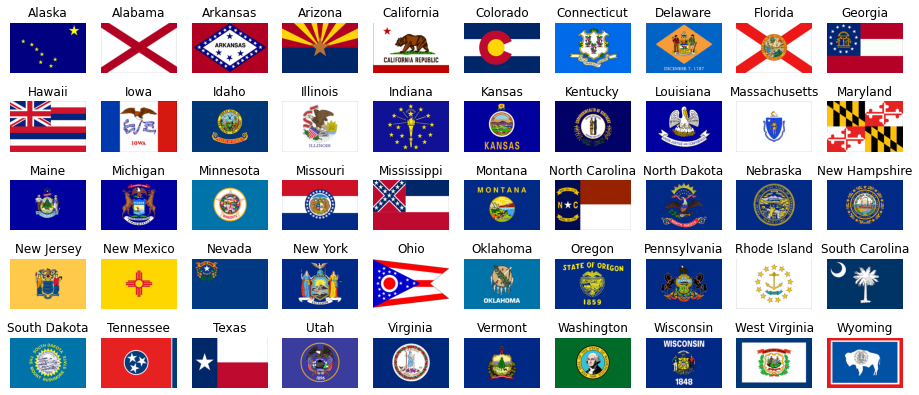

In [23]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State).fetch(as_dict=True)):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

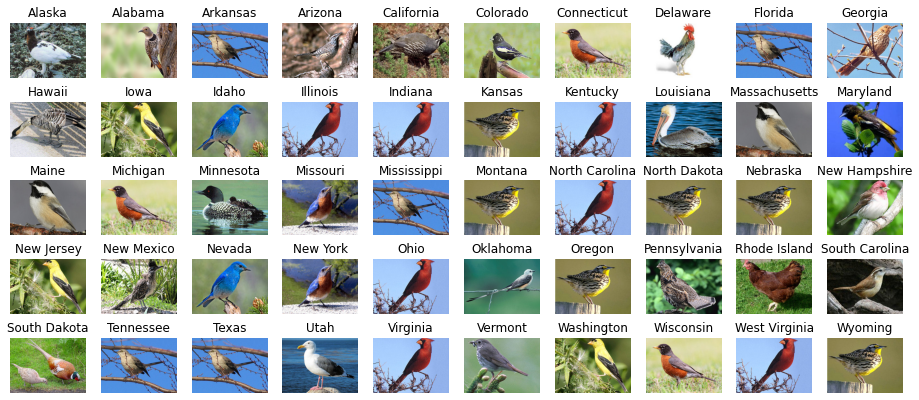

In [24]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))
for ax, info in zip(axx.flatten(), 
                    (StateBird*State).fetch(as_dict=True)):
    ax.imshow(info['bird_image'])
    ax.set_title(info['state'])
    ax.axis(False)

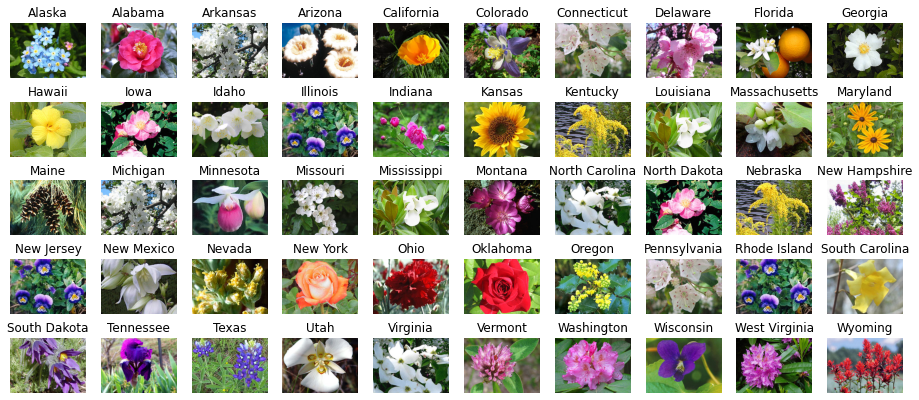

In [25]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))
for ax, info in zip(axx.flatten(), 
                    (StateFlower*State).fetch(as_dict=True)):
    ax.imshow(info['flower_image'])
    ax.set_title(info['state'])
    ax.axis(False)

In [26]:
@schema
class FlagSaturation(dj.Computed):
    definition = """
    -> StateFlag
    ---
    saturation :  float 
    """
    
    def make(self, key):
        img = (StateFlag & key).fetch1('flag_image')
        avg_color = img.mean(axis=(0,1))
        sat = avg_color.max()/avg_color.sum()
        self.insert1(dict(key, saturation=sat))
        

In [27]:
@schema
class BirdSaturation(dj.Computed):
    definition = """
    -> StateBird
    ---
    saturation :  float 
    """
    
    def make(self, key):
        img = (StateBird & key).fetch1('bird_image')
        avg_color = img.mean(axis=(0,1))
        sat = avg_color.max()/avg_color.sum()
        self.insert1(dict(key, saturation=sat))

In [28]:
@schema
class FlowerSaturation(dj.Computed):
    definition = """
    -> StateFlower
    ---
    saturation :  float 
    """
    
    def make(self, key):
        img = (StateFlower & key).fetch1('flower_image')
        avg_color = img.mean(axis=(0,1))
        sat = avg_color.max()/avg_color.sum()
        self.insert1(dict(key, saturation=sat))

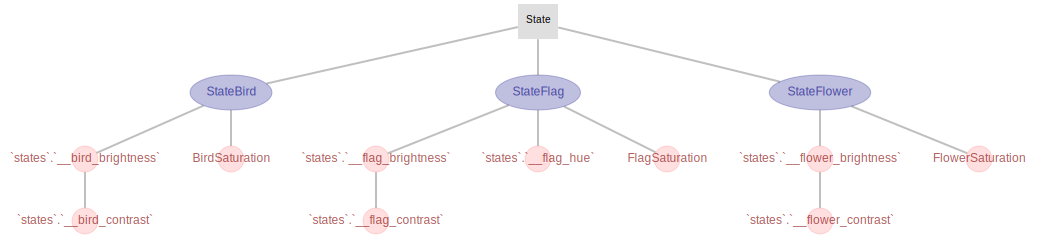

In [29]:
#run before populate and then you don't have to drop the table
dj.Diagram(schema)

In [30]:
FlowerSaturation.populate()

In [31]:
BirdSaturation.populate()

In [32]:
FlagSaturation.populate()

In [33]:
FlagSaturation * State * StateFlag

*state_code    saturation     state          flag_image
+------------+ +------------+ +------------+ +--------+
AK             0.91892        Alaska         =BLOB=    
AL             0.400431       Alabama        =BLOB=    
AR             0.487462       Arkansas       =BLOB=    
AZ             0.454226       Arizona        =BLOB=    
CA             0.378853       California     =BLOB=    
CO             0.390371       Colorado       =BLOB=    
CT             0.560019       Connecticut    =BLOB=    
DE             0.471179       Delaware       =BLOB=    
FL             0.42982        Florida        =BLOB=    
GA             0.476412       Georgia        =BLOB=    
HI             0.421695       Hawaii         =BLOB=    
IA             0.368392       Iowa           =BLOB=    
   ...
 (Total: 50)

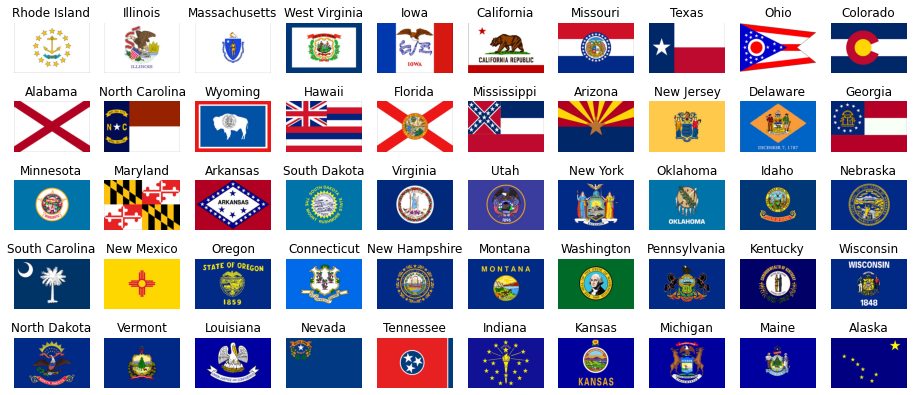

In [34]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State*FlagSaturation).fetch(as_dict=True, order_by='saturation')):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

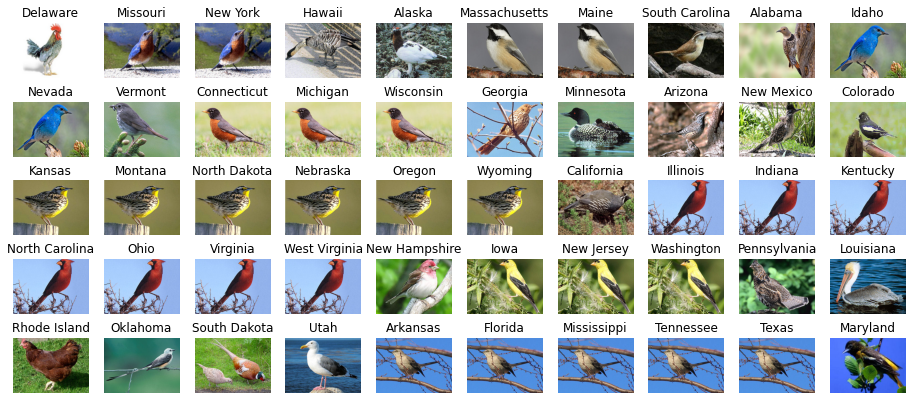

In [35]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateBird*State*BirdSaturation).fetch(as_dict=True, order_by='saturation')):
    ax.imshow(info['bird_image'])
    ax.set_title(info['state'])
    ax.axis(False)

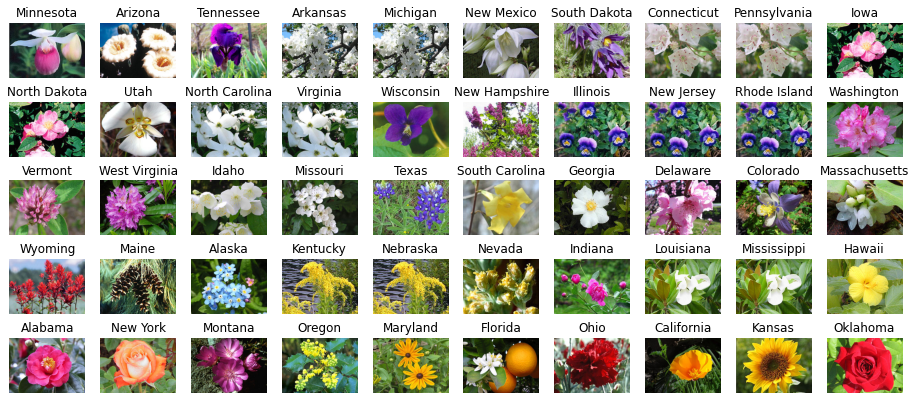

In [36]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlower*State*FlowerSaturation).fetch(as_dict=True, order_by='saturation')):
    ax.imshow(info['flower_image'])
    ax.set_title(info['state'])
    ax.axis(False)

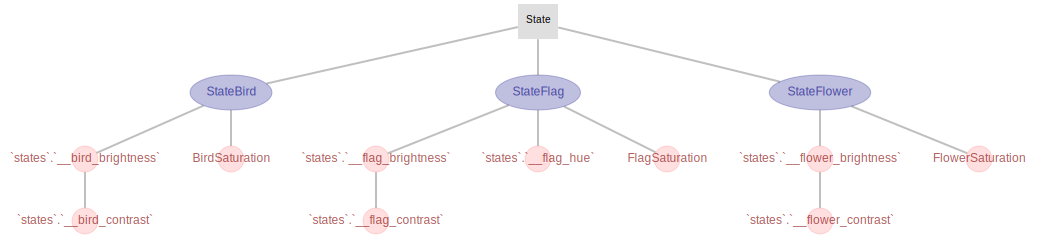

In [37]:
dj.Diagram(schema)

In [38]:
@schema
class FlagBrightness(dj.Computed):
    definition = """
    -> StateFlag
    ---
    brightness :  float 
    """
    
    def make(self, key):
        img = (StateFlag & key).fetch1('flag_image')
        self.insert1(dict(key, brightness=img.mean()))

In [39]:
@schema
class BirdBrightness(dj.Computed):
    definition = """
    -> StateBird
    ---
    brightness :  float 
    """
    
    def make(self, key):
        img = (StateBird & key).fetch1('bird_image')
        self.insert1(dict(key, brightness=img.mean()))

In [40]:
@schema
class FlowerBrightness(dj.Computed):
    definition = """
    -> StateFlower
    ---
    brightness :  float 
    """
    
    def make(self, key):
        img = (StateFlower & key).fetch1('flower_image')
        self.insert1(dict(key, brightness=img.mean()))

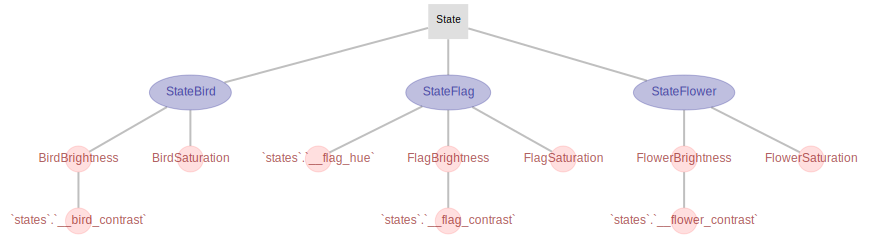

In [41]:
dj.Diagram(schema)

In [42]:
BirdBrightness.populate()

In [43]:
FlowerBrightness.populate()

In [44]:
FlagBrightness.populate()

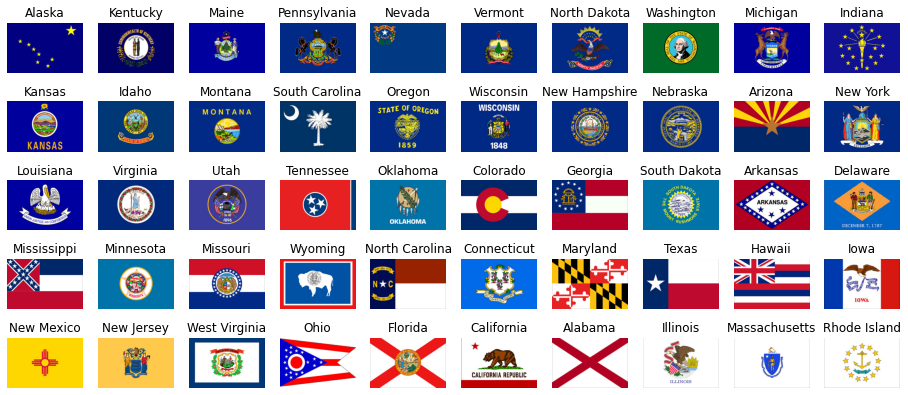

In [45]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State*FlagBrightness).fetch(as_dict=True, order_by='brightness')):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

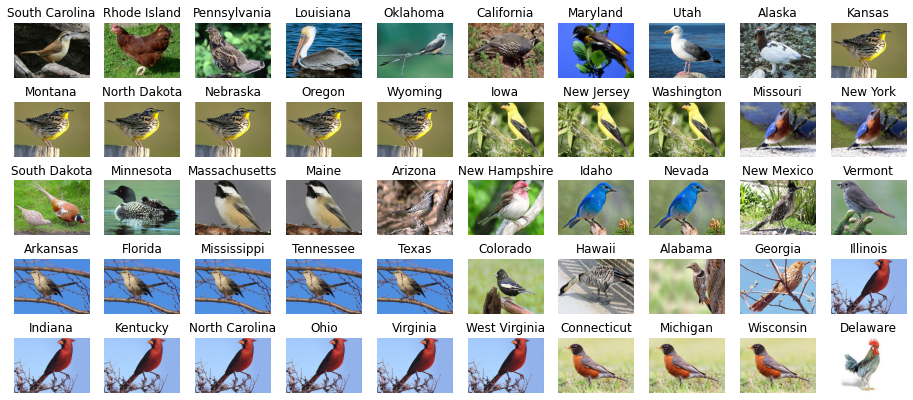

In [46]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateBird*State*BirdBrightness).fetch(as_dict=True, order_by='brightness')):
    ax.imshow(info['bird_image'])
    ax.set_title(info['state'])
    ax.axis(False)

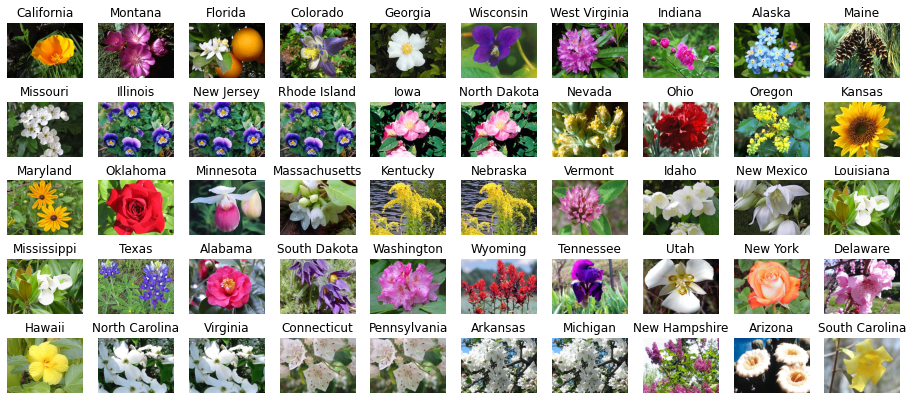

In [47]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlower*State*FlowerBrightness).fetch(as_dict=True, order_by='brightness')):
    ax.imshow(info['flower_image'])
    ax.set_title(info['state'])
    ax.axis(False)

In [48]:
@schema
class FlagContrast(dj.Computed):
    definition = """
    -> FlagBrightness
    ---
    contrast :  float 
    """
    
    def make(self, key):
        img, brightness = (StateFlag * FlagBrightness & key).fetch1('flag_image', 'brightness')
        self.insert1(dict(key, contrast=img.mean(axis=-1).std()/brightness))

In [49]:
@schema
class BirdContrast(dj.Computed):
    definition = """
    -> BirdBrightness
    ---
    contrast :  float 
    """
    
    def make(self, key):
        img, brightness = (StateBird * BirdBrightness & key).fetch1('bird_image', 'brightness')
        self.insert1(dict(key, contrast=img.mean(axis=-1).std()/brightness))

In [50]:
@schema
class FlowerContrast(dj.Computed):
    definition = """
    -> FlowerBrightness
    ---
    contrast :  float 
    """
    
    def make(self, key):
        img, brightness = (StateFlower * FlowerBrightness & key).fetch1('flower_image', 'brightness')
        self.insert1(dict(key, contrast=img.mean(axis=-1).std()/brightness))

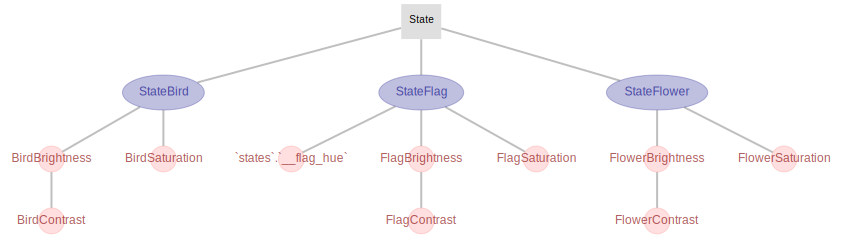

In [51]:
dj.Diagram(schema)

In [52]:
FlowerContrast.populate()

In [53]:
BirdContrast.populate(display_progress=True)

BirdContrast: 0it [00:00, ?it/s]


In [54]:
FlagContrast.populate(display_progress=True)

FlagContrast: 0it [00:00, ?it/s]


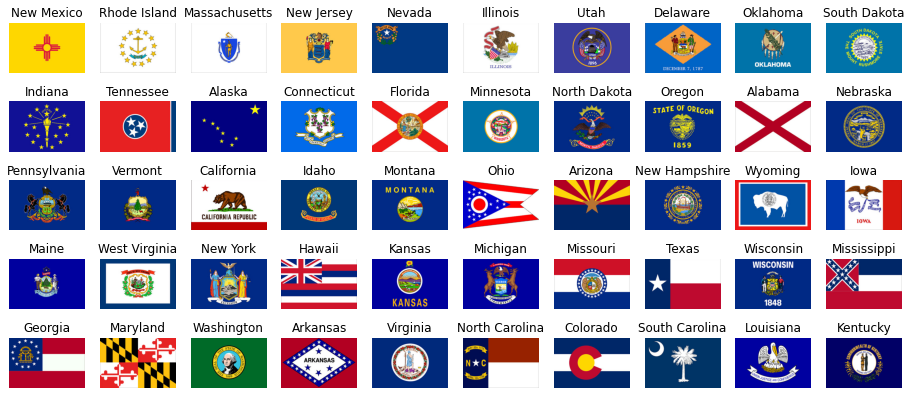

In [55]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State*FlagContrast).fetch(as_dict=True, order_by='contrast')):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

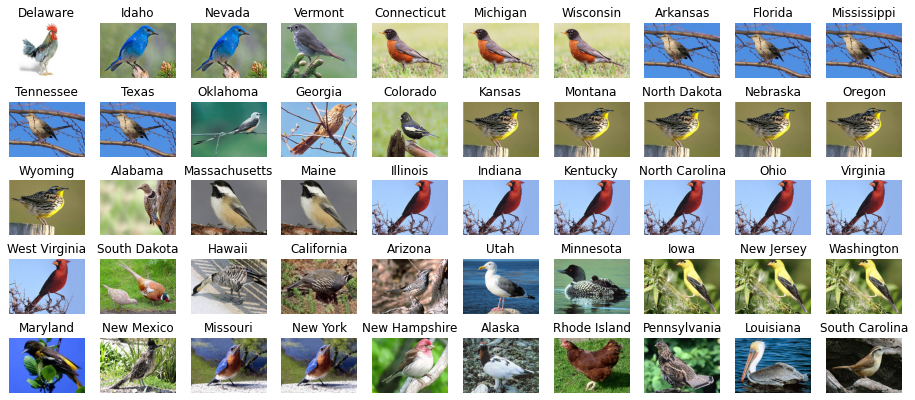

In [56]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateBird*State*BirdContrast).fetch(as_dict=True, order_by='contrast')):
    ax.imshow(info['bird_image'])
    ax.set_title(info['state'])
    ax.axis(False)

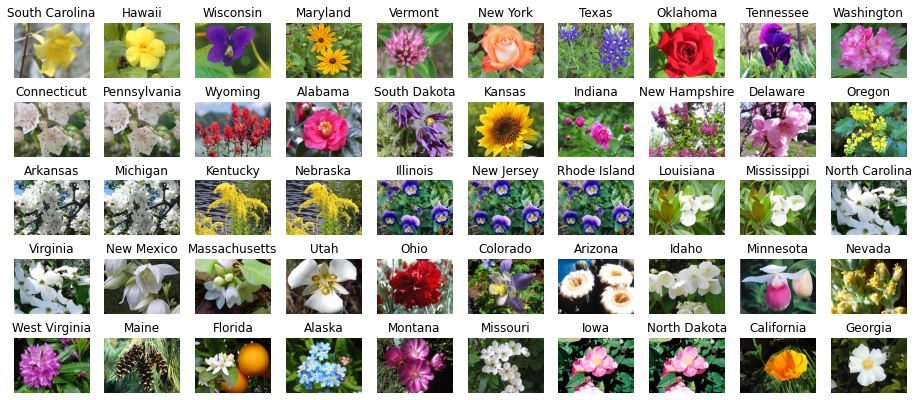

In [57]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlower*State*FlowerContrast).fetch(as_dict=True, order_by='contrast')):
    ax.imshow(info['flower_image'])
    ax.set_title(info['state'])
    ax.axis(False)

In [72]:
@schema
class FlagHue(dj.Computed):
    definition = """
    -> StateFlag
    ---
    hue :  float
    """
    def make(self, key):
        img = (StateFlag & key).fetch1('flag_image')
        
        imgBGR_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(imgBGR_HSV)
       
        self.insert1(dict(key, hue=np.degrees(circmean(np.radians(h*2)))))

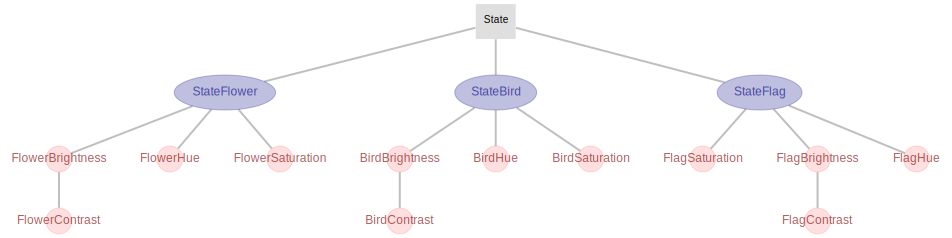

In [79]:
dj.Diagram(schema)

In [76]:
@schema
class BirdHue(dj.Computed):
    definition = """
    -> StateBird
    ---
    hue :  float
    """
    def make(self, key):
        img = (StateBird & key).fetch1('bird_image')
        
        imgBGR_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(imgBGR_HSV)
       
        self.insert1(dict(key, hue=np.degrees(circmean(np.radians(h*2)))))

In [77]:
@schema
class FlowerHue(dj.Computed):
    definition = """
    -> StateFlower
    ---
    hue :  float
    """
    def make(self, key):
        img = (StateFlower & key).fetch1('flower_image')
        
        imgBGR_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(imgBGR_HSV)
       
        self.insert1(dict(key, hue=np.degrees(circmean(np.radians(h*2)))))

In [80]:
FlagHue.populate()
BirdHue.populate()
FlowerHue.populate()

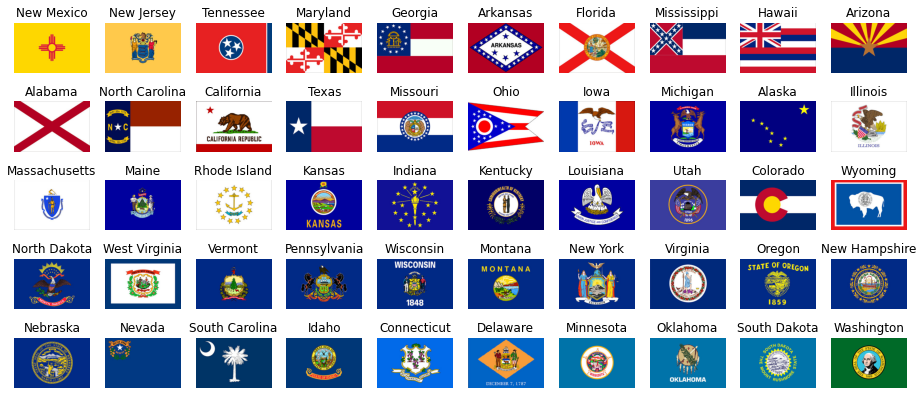

In [82]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlag*State*FlagHue).fetch(as_dict=True, order_by='hue')):
    ax.imshow(info['flag_image'])
    ax.set_title(info['state'])
    ax.axis(False)

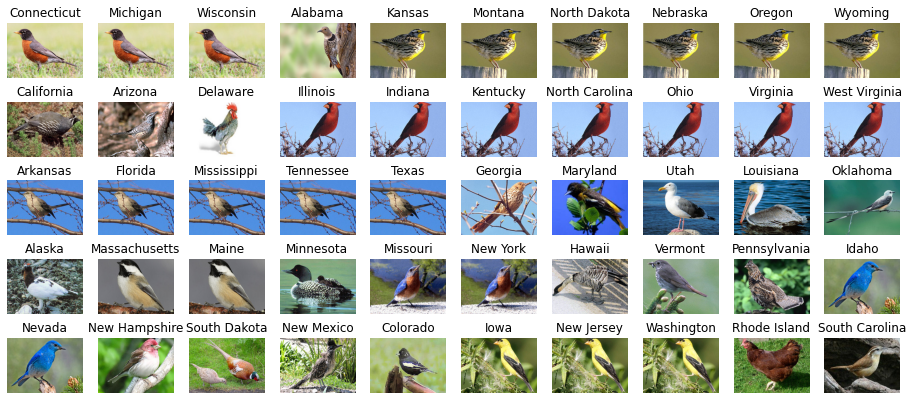

In [83]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateBird*State*BirdHue).fetch(as_dict=True, order_by='hue')):
    ax.imshow(info['bird_image'])
    ax.set_title(info['state'])
    ax.axis(False)

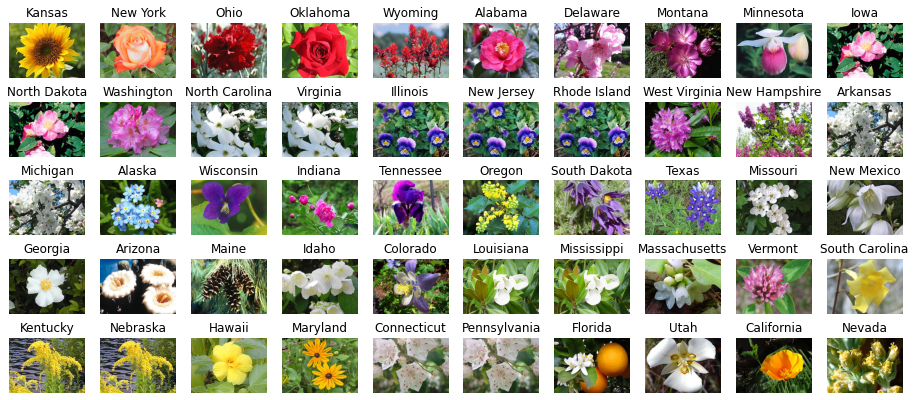

In [84]:
fig, axx = plt.subplots(5, 10, figsize=(16, 7))

for ax, info in zip(axx.flatten(), 
                    (StateFlower*State*FlowerHue).fetch(as_dict=True, order_by='hue')):
    ax.imshow(info['flower_image'])
    ax.set_title(info['state'])
    ax.axis(False)

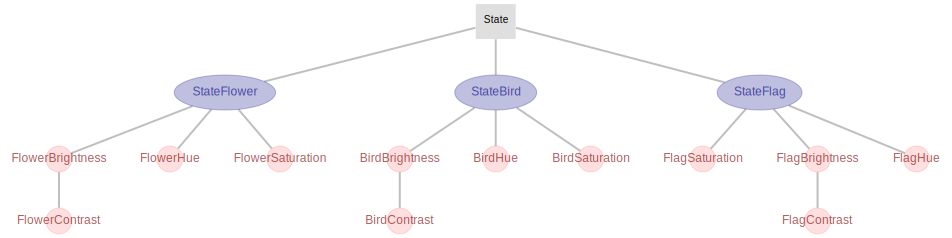

In [85]:
dj.Diagram(schema)

In [105]:
# I was trying to add intensity but kept getting error when I tried to populate

"""@schema
class FlagIntensity(dj.Computed):
    definition = """
    -> StateFlag
    ---
    intensity :  float 
    """
    
    def make(self, key):
        vector = np.vectorize()
        img = vector((StateFlag & key).fetch1('flag_image'))
        inty = img.sum(axis=2)
        self.insert1(dict(key, intensity=inty))"""

In [107]:
# FlagIntensity.populate(display_progress=True)

FlagIntensity:   0%|          | 0/50 [00:00<?, ?it/s]


TypeError: __init__() missing 1 required positional argument: 'pyfunc'

In [112]:
"""vector = np.vectorize(np.float)
img = (StateBird & {'state_code': "TX"}).fetch1('bird_image')
img = vector(img)
inty = img.sum(axis=2)
print(inty)"""

[[450. 444. 441. ... 441. 438. 438.]
 [447. 444. 441. ... 444. 444. 444.]
 [444. 444. 441. ... 450. 450. 450.]
 ...
 [452. 452. 452. ... 353. 272. 288.]
 [452. 452. 452. ... 332. 143. 173.]
 [452. 452. 452. ... 200. 182. 171.]]
